In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sa
import sqlite3
#import psycopg2
%load_ext sql
%sql sqlite:///challenge.db

#### Q1. Are the costs in the 'api_adwords_costs' table fully covered in the 'session_sources' table? Any campaigns where you see issues?

here is some anaylsis to figure out the answer:

In [2]:
%%sql
--CTE: total cpc cost grouped by event_date and campaign_id, so that we can compare to the other table.

with costs as (select campaign_id, event_date, sum(cpc) as tot_cpc
              from session_sources
              group by 1,2
              order by campaign_id), 

aac as (select campaign_id,event_date, cost as cost
       from api_adwords_costs
       order by 1),

--joinig the aac and costs table 
inner_join as (select * 
from costs c
inner join aac
on aac.event_date = c.event_date
and aac.campaign_id = c.campaign_id)

--sum again to find cost and cpc w.r.t campaign_id
select 
campaign_id, 
round(sum(tot_cpc),2) as tot_cpc, 
round(sum(cost),2) as cost,
round(round(sum(cost),2) - round(sum(tot_cpc),2),2) as diff 
from inner_join
group by 1
order by diff desc

 * sqlite:///challenge.db
Done.


campaign_id,tot_cpc,cost,diff
campaign_id_79,0.0,11756.16,11756.16
campaign_id_73,5072.82,5226.56,153.74
campaign_id_52,12452.14,12532.69,80.55
campaign_id_35,7144.23,7219.97,75.74
campaign_id_94,40.74,96.7,55.96
campaign_id_5,711.71,754.65,42.94
campaign_id_156,90.82,118.88,28.06
campaign_id_3,1011.78,1034.96,23.18
campaign_id_22,466.81,488.53,21.72
campaign_id_147,204.78,225.46,20.68


### Results
##### The most significant difference is in campaign_id_79, where the tot_cpc for this campaign is 0 while the cost is 11756.16.

##### Using left joins, we can have a closer look at the differences between session_sources and api_adwords_costs, and we can address the following issues:
1. Some campaign_id are notset in the session_sources.
2. Some campaign_id exists in api_adwords_costs and not in costs and vice verse.

In [36]:
%%sql
with costs as (select campaign_id, event_date, sum(cpc) as tot_cpc
              from session_sources
              group by 1,2
              order by campaign_id), 

aac as (select campaign_id,event_date, cost as cost
       from api_adwords_costs
       order by 1),

--left join aac to costs
left_aac as (select * 
from aac
left join costs c
on aac.event_date = c.event_date
and aac.campaign_id = c.campaign_id),

--left join costs to aac
left_c as (select * 
from costs c
left join aac 
on aac.event_date = c.event_date
and aac.campaign_id = c.campaign_id)

select 
campaign_id, 
round(sum(tot_cpc),2) as tot_cpc, 
round(sum(cost),2) as cost,
round(round(sum(cost),2) - round(sum(tot_cpc),2),2) as diff 
from left_c
group by 1
order by diff desc

 * sqlite:///challenge.db
Done.


campaign_id,tot_cpc,cost,diff
campaign_id_79,0.0,11756.16,11756.16
campaign_id_73,5072.82,5226.56,153.74
campaign_id_52,12452.14,12532.69,80.55
campaign_id_35,7144.23,7219.97,75.74
campaign_id_94,40.74,96.7,55.96
campaign_id_5,711.71,754.65,42.94
campaign_id_156,90.82,118.88,28.06
campaign_id_3,1011.78,1034.96,23.18
campaign_id_22,466.81,488.53,21.72
campaign_id_147,204.78,225.46,20.68


#### Q2. Are the conversions in the 'conversions' table stable over time? Any pattern?

In [120]:
# finding the number of conversions per day and running totalof conversions
cnx = sqlite3.connect('challenge.db')

conversions = pd.read_sql_query("""SELECT count(conv_id) as no_convs,
                                strftime('%d', conv_date) AS day,
                                SUM(count(conv_id)) over (order by conv_date) as running_total
                                FROM conversions   
                                 group by 2
                                order by conv_date""", cnx)
cnx.close()
conversions

,no_convs,day,running_total
0,968,15,968
1,809,16,1777
2,691,17,2468
3,1370,18,3838
4,842,19,4680
5,764,20,5444
6,783,21,6227
7,830,22,7057
8,743,23,7800
9,682,24,8482


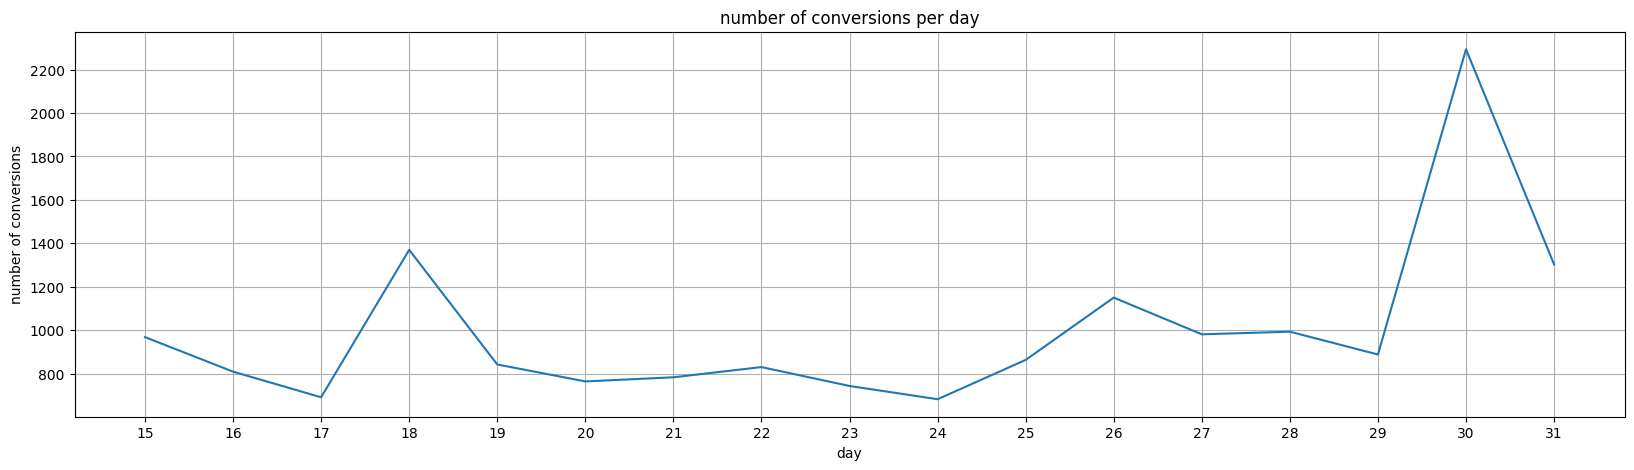

In [121]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(conversions.day, conversions.no_convs)
plt.xlabel('day')
plt.ylabel('number of conversions')
plt.title('number of conversions per day')
plt.grid()

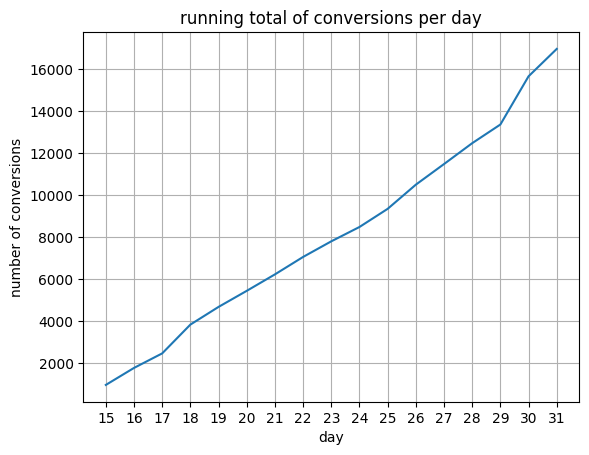

In [123]:
plt.plot(conversions.day, conversions.running_total)
plt.xlabel('day')
plt.ylabel('number of conversions')
plt.title('running total of conversions per day')
plt.grid()

### Results
##### From the charts above, most increase in the number of conversions is from between 17th and 18th, and between 29th and 30th.

In [110]:
cnx = sqlite3.connect('challenge.db')

conversions = pd.read_sql_query("""SELECT count(conv_id) as no_convs,
                                 case cast (strftime('%w', conv_date) as integer)
                                      when 0 then 'Sun'
                                      when 1 then 'Mon'
                                      when 2 then 'Tue'
                                      when 3 then 'Wed'
                                      when 4 then 'Thu'
                                      when 5 then 'Fri'
                                      else 'Sat' end as weekday
                                FROM conversions   
                                 group by 2
                                 """, cnx)
cnx.close()
conversions

,no_convs,weekday
0,3846,Fri
1,1992,Mon
2,2676,Sat
3,2233,Sun
4,2686,Thu
5,1745,Tue
6,1776,Wed


Text(0.5, 1.0, 'Number of conversions eacch day of the week')

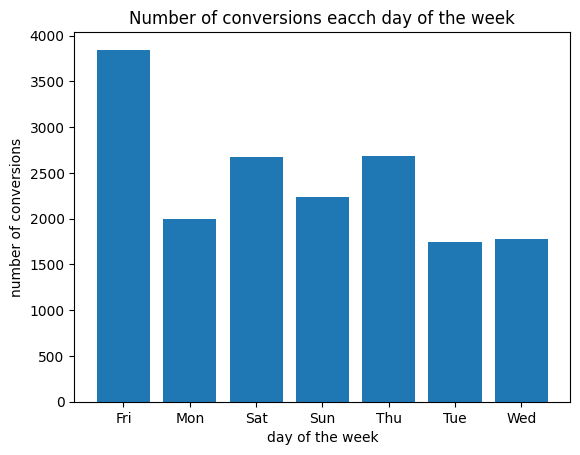

In [117]:
plt.bar(conversions.weekday, conversions.no_convs)
plt.xlabel('day of the week')
plt.ylabel('number of conversions')
plt.title('Number of conversions eacch day of the week')


### Results
##### From the bar chart above, the most conversions happen around weekend (Friday, Thursday ad Saturday)

#### Q3. Double check conversions ('conversions' table) with backend ('conversions_backend' table), any issues?

In [ ]:
%%sql
with ceb as (select * from conversions     --conversions except conversions_backend
            except 
            select * from conversions_backend
            order by conv_id),
bec as (select * from conversions_backend        --conversions_backend except conversions
            except 
            select * from conversions
            order by conv_id),
cib as (select * from conversions     --conversions intersect conversions_backend
            intersect
            select * from conversions_backend
            order by conv_id),

--select count(*) from ceb        ----------> 188
--select count(*) from bec        ----------> 517
--select count(*) from cib        ----------> 16766




reven_diff as (select * from ceb     ----------- differnces in revenue
              inner join bec
              on ceb.conv_id = bec.conv_id 
              and ceb.user_id = bec.user_id
              and ceb.conv_date = bec.conv_date 
              and ceb.market = bec.market)
--select count(*) from reven_diff ------------------> 172


#### Results:
##### 1. The two tables have 16766 records in commen.
##### 2. There is 188 records that exist in conversions and not in conversions_backend.
##### 3. There is 517 records that exist in conversions_backend and not in conversions.
##### 4. Some of the differences in the tables (172) are  due to differences in the revenue column.
##### 5. Rest of the records are almost completely different from each other.

### Q4. Are attribution results consistent? Do you find any conversions where the 'ihc' values don't make sense?

In [137]:
%%sql
--conv_id exist in conversions and not in attribution_customer_journey -----------> 10076
with ce_acj as (select conv_id from conversions
except
select conv_id from attribution_customer_journey),


--conv_id exist in attribution_customer_journey and not in conversions -------------> 138
acje_c as (select conv_id from attribution_customer_journey 
except
select conv_id from conversions),


--conv_id exist in attribution_customer_journey and not in conversions_backend
acje_cb as (select conv_id from attribution_customer_journey ----------------->0
except
select conv_id from conversions_backend)
--select count(*) from ce_acj
--select count(*) from acje_c
--select count(*) from acje_cb


 * sqlite:///challenge.db
Done.


count(*)
0


### Results
#### 1.There are a lot of conv_id (10076) that are missing from the attribution_customer_journey accoarding to the conversions table.
#### 2. Moreover, some of conv_id (138) in the attribution_customer_journey table are not in the conversions table.
#### 3. All conv_id that are in attribution_customer_journey are in conversions_backend.

In [127]:
%%sql
--find total ihc per conv_id in order to make sure the sum up to 1.
with total_ihc as (select conv_id, round(sum(ihc),2) as tot_ihc from attribution_customer_journey
group by 1
order by 2 )

select * from total_ihc
where tot_ihc <> 1

 * sqlite:///challenge.db
Done.


conv_id,tot_ihc
conv_id_10614,0.0
conv_id_1091,0.0
conv_id_15073,0.0
conv_id_404,0.0
conv_id_5356,0.0
conv_id_642,0.0
conv_id_13862,0.33
conv_id_15124,0.33
conv_id_6433,0.33
conv_id_8683,0.33


### Result 
####  The sum of ihc per conv_id should be 1, but in many cases here it is not.

In [151]:
%%sql
with total_ihc as (select conv_id, round(sum(ihc),2) as tot_ihc from attribution_customer_journey
group by 1
order by 2 ),

ihc_not_1 as (select * from total_ihc
where tot_ihc <> 1),

-- adding the session_id back to the table 
session_ids_per_conv_id as (select in1.conv_id, session_id, tot_ihc
from ihc_not_1 in1 
inner join  attribution_customer_journey acj
on in1.conv_id = acj.conv_id
order by in1.conv_id)

--checking if there is any session_id that is missing form the attribution_customer_journey table
select conv_id, ss.session_id, tot_ihc
from session_sources ss
left join session_ids_per_conv_id si 
on si.session_id = ss.session_id
where tot_ihc is null
order by conv_id
limit 10

 * sqlite:///challenge.db
Done.


conv_id,session_id,tot_ihc
None,session_id_1,None
None,session_id_10,None
None,session_id_100,None
None,session_id_1000,None
None,session_id_10000,None
None,session_id_100000,None
None,session_id_1000000,None
None,session_id_1000001,None
None,session_id_1000002,None
None,session_id_1000003,None


### Result
#### One reason why tot_ihc for some conv_id don't sum up to 1, is because there are some session_id that don't exist in the attribution_customer_journey in comparison with session_sources table.

### Q5. Do we have an issue with channeling? Are the number of sessions per channel stable over time?

In [152]:
%%sql
select distinct channel_name from session_sources
order by 1

 * sqlite:///challenge.db
Done.


channel_name
Affiliate
Affiliates
Content Marketing
Direct
Direct Traffic
Display
Display Remarketing
Email
Google Remarketing
Influencers


### Result
#### There is an issue with the channel_name column, as there are repeated but with different formatting (e.g. Affiliate and Affiliates)